In [176]:
import numpy as np
import matplotlib.pyplot as plt

# TLU

In [165]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data[:, 2:]
y = iris.target

# Getting only species 1 and 2
X = X[(y==1)+(y==2)]
y = y[(y==1)+(y==2)]

# Setting y to be 0 or 1
y = y-1

m, n = X.shape

In [166]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_std = std.fit_transform(X)

In [167]:
w = np.random.rand(n+1)
X_bias = np.c_[np.ones(m), X_std]

z = np.dot(X_bias, w)

In [168]:
@np.vectorize
def step(z):
    if z >= 0:
        return 1.0
    else:
        return 0.0

In [169]:
def MSE(error):
    return np.mean(error**2)

In [205]:
eta = 0.1
tol = 1e-3
max_iter = 10000

for k in range(max_iter):
    z = np.dot(X_bias, w)
    y_pred = step(z)
    error = y - y_pred
    
    for j in range(m):
        for i in range(1,n):
            w[i] = w[i] + (eta*error[i]*X_bias[j,i])
    
    if MSE(error) <= tol:
        print(f"Converged after {i+1} iterations.")
        break
        

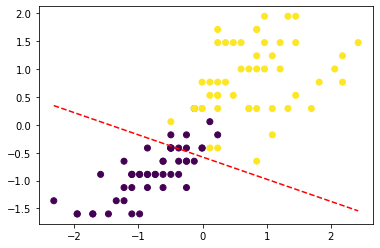

In [206]:
# Boundary
x1_extremes = [X_std[:,0].min(), X_std[:,0].max()]
boundary = -(w[0] + np.dot(w[1], x1_extremes))/w[2]

plt.scatter(X_std[:,0], X_std[:,1], c=y)
plt.plot(x1_extremes, boundary, ls='--', c='r')
plt.show()

# Perceptron